# UKB24983 v2 release (488k dataset) marker QC. 

## Yosuke Tanigawa (ytanigaw@stanford.edu) on 2017/7/25

## Guhan Venkataraman (guhan@stanford.edu) on 2018/11/2

- summary: pass_QC files are not informative

In [1]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools as it
import collections as cl

# plot

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
def check_df(df):
    """Show the shape and first 5 entries of a given pandas data frame"""
    print('shape of this data frame is {}'.format(df.shape))
    return df.head()

## read marker QC file 
- http://biobank.ndph.ox.ac.uk/showcase/refer.cgi?id=531

In [3]:
#snp_f = '/scratch/PI/mrivas/ukbb/24983/snp/ukb_snp_qc.txt'
#File location has been updated
snp_f = '/oak/stanford/groups/mrivas/ukbb24983/snp/snp_download/ukb_snp_qc.txt'

In [4]:
snp_df = pd.read_csv(snp_f, sep='\s+')

### subset to autosomes

In [5]:
cl.Counter(snp_df.chromosome)

Counter({1: 63487,
         2: 61966,
         3: 52300,
         4: 47443,
         5: 46314,
         6: 53695,
         7: 42722,
         8: 38591,
         9: 34310,
         10: 38308,
         11: 40824,
         12: 37302,
         13: 26806,
         14: 25509,
         15: 24467,
         16: 28960,
         17: 28835,
         18: 21962,
         19: 26186,
         20: 19959,
         21: 11342,
         22: 12968,
         23: 18857,
         24: 691,
         25: 1357,
         26: 265})

In [6]:
snp_auto_df = snp_df[snp_df.chromosome < 23]

In [7]:
check_df(snp_auto_df)

shape of this data frame is (784256, 159)


,rs_id,affymetrix_snp_id,affymetrix_probeset_id,chromosome,position,allele1_ref,allele2_alt,strand,array,Batch_b001_qc,...,PC32_loading,PC33_loading,PC34_loading,PC35_loading,PC36_loading,PC37_loading,PC38_loading,PC9_loading.3,PC40_loading,in_Phasing_Input
0,rs28659788,Affx-13546538,AX-32115783,1,723307,C,G,+,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,rs116587930,Affx-35298040,AX-37361813,1,727841,G,A,+,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,rs116720794,Affx-13637449,AX-32137419,1,729632,C,T,+,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,rs3131972,Affx-13945728,AX-13191280,1,752721,A,G,+,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,rs12184325,Affx-13963217,AX-11194291,1,754105,C,T,+,2,1,...,-0.003471,0.005899,-0.003739,-0.001896,-0.002869,0.000792,-0.00191,0.003075,-0.000411,1


In [8]:
Batch_UKBB = [x for x in snp_df.columns if x[:6] == 'Batch_']
Batch_UKBiLEVEAX = [x for x in snp_df.columns if x[:11] == 'UKBiLEVEAX_']

### count

In [9]:
is_in_UKBiLEVEAX = snp_auto_df[Batch_UKBiLEVEAX[0]] > 0
for i in range(1, len(Batch_UKBiLEVEAX)):
    is_in_UKBiLEVEAX = is_in_UKBiLEVEAX | (snp_auto_df[Batch_UKBiLEVEAX[i]] > 0)

In [10]:
cl.Counter(is_in_UKBiLEVEAX)

Counter({False: 442, True: 783814})

In [11]:
is_in_UKBB = snp_auto_df[Batch_UKBB[0]] > 0
for i in range(1, len(Batch_UKBB)):
    is_in_UKBB = is_in_UKBB | (snp_auto_df[Batch_UKBB[i]] > 0)

In [12]:
cl.Counter(is_in_UKBB)

Counter({True: 784256})

In [13]:
is_all_in_UKBiLEVEAX = snp_auto_df[Batch_UKBiLEVEAX[0]] > 0
for i in range(1, len(Batch_UKBiLEVEAX)):
    is_all_in_UKBiLEVEAX = is_all_in_UKBiLEVEAX & (snp_auto_df[Batch_UKBiLEVEAX[i]] > 0)

In [14]:
cl.Counter(is_all_in_UKBiLEVEAX)

Counter({False: 12014, True: 772242})

In [15]:
is_all_in_UKBB = snp_auto_df[Batch_UKBB[0]] > 0
for i in range(1, len(Batch_UKBB)):
    is_all_in_UKBB = is_all_in_UKBB & (snp_auto_df[Batch_UKBB[i]] > 0)

In [16]:
cl.Counter(is_all_in_UKBB)

Counter({False: 43349, True: 740907})

## examine some examples

In [17]:
snp_df[snp_df.affymetrix_snp_id == 'Affx-86888522']

,rs_id,affymetrix_snp_id,affymetrix_probeset_id,chromosome,position,allele1_ref,allele2_alt,strand,array,Batch_b001_qc,...,PC32_loading,PC33_loading,PC34_loading,PC35_loading,PC36_loading,PC37_loading,PC38_loading,PC9_loading.3,PC40_loading,in_Phasing_Input
15459,Affx-86888522,Affx-86888522,AX-90025726,1,45796895,C,A,+,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [18]:
is_in_UKBB[15459], is_in_UKBiLEVEAX[15459], is_all_in_UKBB[15459], is_all_in_UKBiLEVEAX[15459]

(True, True, True, True)

## plot QC pass rate for each batch

In [19]:
Batch_UKBB_pass_QC_rate_per_batch = [
    np.sum(snp_auto_df[Batch_UKBB[i]] > 0) / len(snp_auto_df) 
    for i in range(len(Batch_UKBB))
]
Batch_UKBiLEVEAX_pass_QC_rate_per_batch = [
    np.sum(snp_auto_df[Batch_UKBiLEVEAX[i]] > 0) / len(snp_auto_df) 
    for i in range(len(Batch_UKBiLEVEAX))
]

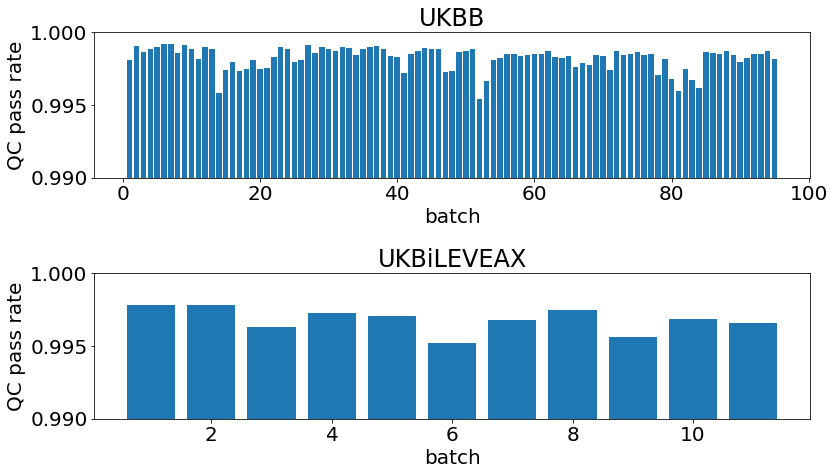

In [20]:
fig = plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(2, 1)
axs = [fig.add_subplot(ss) for ss in gs]
axs[0].bar(range(1, len(Batch_UKBB_pass_QC_rate_per_batch) + 1), 
            Batch_UKBB_pass_QC_rate_per_batch)
axs[1].bar(range(1, len(Batch_UKBiLEVEAX_pass_QC_rate_per_batch) + 1), 
            Batch_UKBiLEVEAX_pass_QC_rate_per_batch)
for ax in axs:
    ax.set_ylim([0.99, 1])
    ax.set_ylabel('QC pass rate')
    ax.set_xlabel('batch')
axs[0].set_title('UKBB')
axs[1].set_title('UKBiLEVEAX')
# fig.suptitle('')
gs.tight_layout(fig, rect=[0, 0, 1, 1])
# fig.savefig('./fig.png')